# Analysis

AmpScan offeres several methods for analysis of the shapes. This analysis can then be plotted using matplotlib

In [1]:
from AmpScan import AmpObject, align, registration, analyse
import numpy as np
%matplotlib inline

In [2]:
base = AmpObject('stl_file.stl')
targ = AmpObject('stl_file_2.stl')

## Slicing 

The analysis code is mostly dependent upon the way in which the scan is sliced into 2D shapes. The examples below show the effect of using coarse or fine slicing

In [3]:
import matplotlib.pyplot as plt
coarse = analyse.create_slices(base, [0.1, 0.9], 0.1, typ='norm_intervals')
fine = analyse.create_slices(base, [0.01, 0.99], 0.01, typ='norm_intervals')

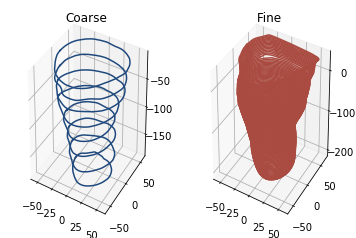

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for p in coarse:
    ax1.plot(p[:,0],
             p[:,1],
             p[:,2],
             color=[31.0/255, 73.0/255, 125.0/255])
ax1.set_title('Coarse')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Fine')
for p in fine:
    ax2.plot(p[:,0],
             p[:,1],
             p[:,2],
             color=[170.0/255, 75.0/255, 65.0/255])

As you can see, the number of slices used make a clear visual difference to the shape. We can then calculate several metrics. 

## Volume, Cross-section area and Widths

We can estimate the volume based upon the slices we have generated 

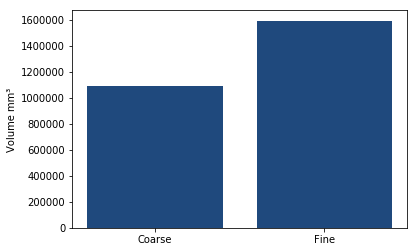

In [5]:
fig, ax = plt.subplots()
ax.bar((0, 1), (analyse.est_volume(coarse), analyse.est_volume(fine)), color=[31.0/255, 73.0/255, 125.0/255])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Coarse', 'Fine'])
ax.set_ylabel('Volume mm³')
None

As you can see the number of slices used makes a large difference to the volume in this case! 

Then we can plot the cross-sectional area and both the coronal and sagittal widths

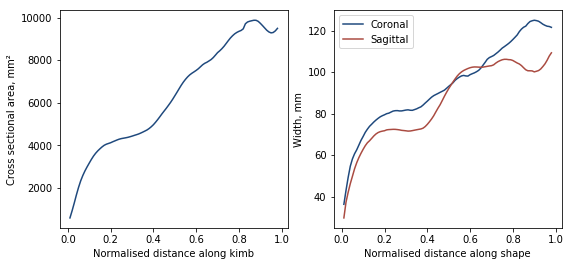

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(9, 4)
ax1.plot(np.arange(0.01, 0.99, 0.01), analyse.calc_csa(fine), color=[31.0/255, 73.0/255, 125.0/255])
ax1.set_xlabel('Normalised distance along kimb')
ax1.set_ylabel('Cross sectional area, mm²')
cor, sag = analyse.calc_widths(fine)
ax2.plot(np.arange(0.01, 0.99, 0.01), cor, color=[31.0/255, 73.0/255, 125.0/255], label='Coronal')
ax2.plot(np.arange(0.01, 0.99, 0.01), sag, color=[170.0/255, 75.0/255, 65.0/255], label='Sagittal')
ax2.set_xlabel('Normalised distance along shape')
ax2.set_ylabel('Width, mm')
ax2.legend()
None

## Registration analysis

Finally we can also analyse the distribution of shape deviation between shapes, with colour corresponding to the 3D visualisation

In [7]:
reg = registration(base, targ, steps=10, neigh=10, smooth=1)

c:\users\josh\documents\code\ampscan\AmpScan\core.py:248: RuntimeWarning: invalid value encountered in true_divide
  self.norm = np.divide(norms, mag[:,None])


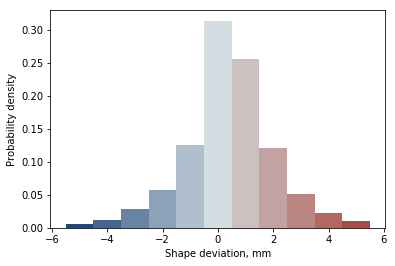

In [8]:
c1 = [31.0, 73.0, 125.0]
c3 = [170.0, 75.0, 65.0]
c2 = [212.0, 221.0, 225.0]
CMap1 = np.c_[[np.linspace(st, en, 6) for (st, en) in zip(c1, c2)]]
CMap2 = np.c_[[np.linspace(st, en, 6) for (st, en) in zip(c2, c3)]]
CMap = np.c_[CMap1[:, :-1], CMap2]/255

fig, ax = plt.subplots()
N, bins, patches = ax.hist(reg.reg.values, bins=11, range=(-5.5, 5.5), density=True)
ax.set_xlabel('Shape deviation, mm')
ax.set_ylabel('Probability density')

for i, p in enumerate(patches):
    p.set_facecolor(CMap[:, i])

There we have it, this is the basic functionality of AmpScan. Much of this can be accessed using the webapp, or there's way more you can do with your own analysis. Enjoy!